## y-finance, pandas datareading

In [3]:
from IPython.core.pylabtools import figsize
from dotenv import load_dotenv
import os

from matplotlib.pyplot import title
from numpy.f2py.cb_rules import cb_map
from scipy.ndimage import label

load_dotenv()
import numpy as np
import pandas as pd
import pandas_datareader as pdr


TIINGO_API_KEY = os.getenv("TIINGO_APIKEY")
ALPHA_VANTAGE_APIKEY = os.getenv("ALPHA_VANTAGE_APIKEY")

aapl_data = pdr.get_data_tiingo('AAPL', api_key=TIINGO_API_KEY)


In [7]:
aapl_data.head()

close    high     low    open     volume  \
symbol date                                                                   
AAPL   2020-10-29 00:00:00+00:00  115.32  116.93  112.20  112.37  146129173   
       2020-10-30 00:00:00+00:00  108.86  111.99  107.72  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.32  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.73  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.35  114.14  138235482   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00  112.184904  113.751134  109.149724   
       2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2020-10-29 00:00:00+00:00  109.315102  146129173      0.0          1.0  
       2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0  
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0  
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0  
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0

In [8]:
aapl_data["returns"] = aapl_data['adjClose'].pct_change()
threshold=0.05
outliers = aapl_data[abs(aapl_data['returns'])>threshold]
outliers

close      high     low     open  \
symbol date                                                           
AAPL   2020-10-30 00:00:00+00:00  108.86  111.9900  107.72  111.060   
       2020-12-15 00:00:00+00:00  127.88  127.9000  124.13  124.340   
       2021-03-01 00:00:00+00:00  127.79  127.9300  122.79  123.750   
       2022-01-28 00:00:00+00:00  170.33  170.3500  162.80  165.710   
       2022-05-05 00:00:00+00:00  156.77  164.0800  154.95  163.850   
       2022-05-11 00:00:00+00:00  146.50  155.4500  145.81  153.500   
       2022-05-18 00:00:00+00:00  140.82  147.3601  139.90  146.850   
       2022-09-13 00:00:00+00:00  153.84  160.5400  153.37  159.900   
       2022-10-28 00:00:00+00:00  155.74  157.5000  147.82  148.200   
       2022-11-10 00:00:00+00:00  146.87  146.8700  139.50  141.240   
       2024-05-03 00:00:00+00:00  183.38  187.0000  182.66  186.645   
       2024-06-11 00:00:00+00:00  207.15  207.1600  193.63  193.650   
       2025-04-03 00:00:00+00:00  203.19  207.4900  201.25  205.540   
       2025-04-04 00:00:00+00:00  188.38  199.8800  187.34  193.890   
       2025-04-09 00:00:00+00:00  198.85  200.6100  171.89  171.950   
       2025-05-12 00:00:00+00:00  210.79  211.2679  206.75  210.970   
       2025-08-06 00:00:00+00:00  213.25  215.3800  205.59  205.630   

                                     volume    adjClose     adjHigh  \
symbol date                                                           
AAPL   2020-10-30 00:00:00+00:00  190573476  105.900525  108.945433   
       2020-12-15 00:00:00+00:00  157572262  124.618315  124.637805   
       2021-03-01 00:00:00+00:00  116307892  124.717279  124.853912   
       2022-01-28 00:00:00+00:00  179935660  167.008461  167.028071   
       2022-05-05 00:00:00+00:00  130525275  153.909054  161.085651   
       2022-05-11 00:00:00+00:00  142689825  144.036800  152.836318   
       2022-05-18 00:00:00+00:00  109742890  138.452302  144.882439   
       2022-09-13 00:00:00+00:00  122656614  151.463780  158.060291   
       2022-10-28 00:00:00+00:00  164762371  153.334432  155.067247   
       2022-11-10 00:00:00+00:00  118854028  144.841779  144.841779   
       2024-05-03 00:00:00+00:00  163224109  182.084723  185.679154   
       2024-06-11 00:00:00+00:00  172373296  205.967743  205.977686   
       2025-04-03 00:00:00+00:00  103419006  202.707691  206.997484   
       2025-04-04 00:00:00+00:00  125910913  187.932845  199.405548   
       2025-04-09 00:00:00+00:00  184395885  198.377993  200.133815   
       2025-05-12 00:00:00+00:00   63775814  210.549034  211.026387   
       2025-08-06 00:00:00+00:00  108483103  213.006221  215.133786   

                                      adjLow     adjOpen  adjVolume  divCash  \
symbol date                                                                    
AAPL   2020-10-30 00:00:00+00:00  104.791518  108.040716  190573476     0.00   
       2020-12-15 00:00:00+00:00  120.963962  121.168605  157572262     0.00   
       2021-03-01 00:00:00+00:00  119.837504  120.774421  116307892     0.00   
       2022-01-28 00:00:00+00:00  159.625300  162.478553  179935660     0.00   
       2022-05-05 00:00:00+00:00  152.122267  160.859848  130525275     0.00   
       2022-05-11 00:00:00+00:00  143.358402  150.919105  142689825     0.00   
       2022-05-18 00:00:00+00:00  137.547770  144.380915  109742890     0.00   
       2022-09-13 00:00:00+00:00  151.001039  157.430177  122656614     0.00   
       2022-10-28 00:00:00+00:00  145.536765  145.910896  164762371     0.00   
       2022-11-10 00:00:00+00:00  137.573556  139.289528  118854028     0.00   
       2024-05-03 00:00:00+00:00  181.369808  185.326661  163224109     0.00   
       2024-06-11 00:00:00+00:00  192.524905  192.544791  172373296     0.00   
       2025-04-03 00:00:00+00:00  200.772296  205.052113  103419006     0.00   
       2025-04-04 00:00:00+00:00  186.895314  193.429766  125910913     0.00   
       2025-04-09 00:00:00+00:00  171.481987  171.54184

In [9]:
aapl_data.drop('returns',axis=1, inplace=True)

1. Simple Return = $(P_t - P_{t-1})$ / $P_{t-1}$
2. Log return  = log($P_t / P_{t-1}$)

In [10]:
aapl_data['Simple_Return'] = aapl_data['adjClose'].pct_change()
aapl_data['Log_Return'] = np.log(aapl_data['adjClose']/aapl_data['adjClose'].shift(1))

In [11]:
aapl_data

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  115.32  116.93  112.2000  112.37  146129173   
       2020-10-30 00:00:00+00:00  108.86  111.99  107.7200  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.3200  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.7300  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.3500  114.14  138235482   
...                                  ...     ...       ...     ...        ...   
       2025-10-21 00:00:00+00:00  262.77  265.29  261.8300  261.88   46695948   
       2025-10-22 00:00:00+00:00  258.45  262.85  255.4300  262.65   45015254   
       2025-10-23 00:00:00+00:00  259.58  260.62  258.0101  259.94   32754941   
       2025-10-24 00:00:00+00:00  262.82  264.13  259.1800  261.19   38253717   
       2025-10-27 00:00:00+00:00  268.81  269.12  264.6501  264.88   44888152   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00  112.184904  113.751134  109.149724   
       2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   
...                                      ...         ...         ...   
       2025-10-21 00:00:00+00:00  262.770000  265.290000  261.830000   
       2025-10-22 00:00:00+00:00  258.450000  262.850000  255.430000   
       2025-10-23 00:00:00+00:00  259.580000  260.620000  258.010100   
       2025-10-24 00:00:00+00:00  262.820000  264.130000  259.180000   
       2025-10-27 00:00:00+00:00  268.810000  269.120000  264.650100   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  109.315102  146129173      0.0          1.0   
       2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0   
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0   
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0   
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0   
...                                      ...        ...      ...          ...   
       2025-10-21 00:00:00+00:00  261.880000   46695948      0.0          1.0   
       2025-10-22 00:00:00+00:00  262.650000   45015254      0.0          1.0   
       2025-10-23 00:00:00+00:00  259.940000   32754941      0.0          1.0   
       2025-10-24 00:00:00+00:00  261.190000   38253717      0.0          1.0   
       2025-10-27 00:00:00+00:00  264.880000   44888152      0.0          1.0   

                                  Simple_Return  Log_Return  
symbol date                                                  
AAPL   2020-10-29 00:00:00+00:00            NaN         NaN  
       2020-10-30 00:00:00+00:00      -0.056018   -0.057648  
       2020-11-02 00:00:00+00:00      -0.000827   -0.000827  
       2020-11-03 00:00:00+00:00       0.015353    0.015237  
       2020-11-04 00:00:00+00:00       0.040837    0.040025  
...                                         ...         ...  
       2025-10-21 00:00:00+00:00       0.002021    0.002019  
       2025-10-22 00:00:00+00:00      -0.016440   -0.016577  
       2025-10-23 00:00:00+00:00       0.004372    0.004363  
       2025-10-24 00:00:00+00:00       0.012482    0.012404  
       2025-10-27 00:00:00+00:00       0.022791    0.022535  

[1254 rows x 14 columns]

1. Moving average: average of the adjclose over past few days(20,30,50)
2. Volatility: it is standard deviation of the stock's daily log returns. higher indicates that the stock is fluctuating a lot in that window

In [12]:
aapl_data['MA_20'] = aapl_data['adjClose'].rolling(window=20).mean()
aapl_data

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  115.32  116.93  112.2000  112.37  146129173   
       2020-10-30 00:00:00+00:00  108.86  111.99  107.7200  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.3200  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.7300  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.3500  114.14  138235482   
...                                  ...     ...       ...     ...        ...   
       2025-10-21 00:00:00+00:00  262.77  265.29  261.8300  261.88   46695948   
       2025-10-22 00:00:00+00:00  258.45  262.85  255.4300  262.65   45015254   
       2025-10-23 00:00:00+00:00  259.58  260.62  258.0101  259.94   32754941   
       2025-10-24 00:00:00+00:00  262.82  264.13  259.1800  261.19   38253717   
       2025-10-27 00:00:00+00:00  268.81  269.12  264.6501  264.88   44888152   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00  112.184904  113.751134  109.149724   
       2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   
...                                      ...         ...         ...   
       2025-10-21 00:00:00+00:00  262.770000  265.290000  261.830000   
       2025-10-22 00:00:00+00:00  258.450000  262.850000  255.430000   
       2025-10-23 00:00:00+00:00  259.580000  260.620000  258.010100   
       2025-10-24 00:00:00+00:00  262.820000  264.130000  259.180000   
       2025-10-27 00:00:00+00:00  268.810000  269.120000  264.650100   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  109.315102  146129173      0.0          1.0   
       2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0   
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0   
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0   
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0   
...                                      ...        ...      ...          ...   
       2025-10-21 00:00:00+00:00  261.880000   46695948      0.0          1.0   
       2025-10-22 00:00:00+00:00  262.650000   45015254      0.0          1.0   
       2025-10-23 00:00:00+00:00  259.940000   32754941      0.0          1.0   
       2025-10-24 00:00:00+00:00  261.190000   38253717      0.0          1.0   
       2025-10-27 00:00:00+00:00  264.880000   44888152      0.0          1.0   

                                  Simple_Return  Log_Return     MA_20  
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00            NaN         NaN       NaN  
       2020-10-30 00:00:00+00:00      -0.056018   -0.057648       NaN  
       2020-11-02 00:00:00+00:00      -0.000827   -0.000827       NaN  
       2020-11-03 00:00:00+00:00       0.015353    0.015237       NaN  
       2020-11-04 00:00:00+00:00       0.040837    0.040025       NaN  
...                                         ...         ...       ...  
       2025-10-21 00:00:00+00:00       0.002021    0.002019  254.2180  
       2025-10-22 00:00:00+00:00      -0.016440   -0.016577  254.5250  
       2025-10-23 00:00:00+00:00       0.004372    0.004363  254.6605  
       2025-10-24 00:00:00+00:00       0.012482    0.012404  255.0285  
       2025-10-27 00:00:00+00:00       0.022791    0.022535  255.7475  

[1254 rows x 15 columns]

In [13]:
aapl_data['Vol_20'] = aapl_data['Log_Return'].rolling(window=20).std()*np.sqrt(252) # annualized value 252 trading days per year

In [14]:
aapl_data

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  115.32  116.93  112.2000  112.37  146129173   
       2020-10-30 00:00:00+00:00  108.86  111.99  107.7200  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.3200  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.7300  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.3500  114.14  138235482   
...                                  ...     ...       ...     ...        ...   
       2025-10-21 00:00:00+00:00  262.77  265.29  261.8300  261.88   46695948   
       2025-10-22 00:00:00+00:00  258.45  262.85  255.4300  262.65   45015254   
       2025-10-23 00:00:00+00:00  259.58  260.62  258.0101  259.94   32754941   
       2025-10-24 00:00:00+00:00  262.82  264.13  259.1800  261.19   38253717   
       2025-10-27 00:00:00+00:00  268.81  269.12  264.6501  264.88   44888152   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00  112.184904  113.751134  109.149724   
       2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   
...                                      ...         ...         ...   
       2025-10-21 00:00:00+00:00  262.770000  265.290000  261.830000   
       2025-10-22 00:00:00+00:00  258.450000  262.850000  255.430000   
       2025-10-23 00:00:00+00:00  259.580000  260.620000  258.010100   
       2025-10-24 00:00:00+00:00  262.820000  264.130000  259.180000   
       2025-10-27 00:00:00+00:00  268.810000  269.120000  264.650100   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  109.315102  146129173      0.0          1.0   
       2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0   
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0   
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0   
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0   
...                                      ...        ...      ...          ...   
       2025-10-21 00:00:00+00:00  261.880000   46695948      0.0          1.0   
       2025-10-22 00:00:00+00:00  262.650000   45015254      0.0          1.0   
       2025-10-23 00:00:00+00:00  259.940000   32754941      0.0          1.0   
       2025-10-24 00:00:00+00:00  261.190000   38253717      0.0          1.0   
       2025-10-27 00:00:00+00:00  264.880000   44888152      0.0          1.0   

                                  Simple_Return  Log_Return     MA_20  \
symbol date                                                             
AAPL   2020-10-29 00:00:00+00:00            NaN         NaN       NaN   
       2020-10-30 00:00:00+00:00      -0.056018   -0.057648       NaN   
       2020-11-02 00:00:00+00:00      -0.000827   -0.000827       NaN   
       2020-11-03 00:00:00+00:00       0.015353    0.015237       NaN   
       2020-11-04 00:00:00+00:00       0.040837    0.040025       NaN   
...                                         ...         ...       ...   
       2025-10-21 00:00:00+00:00       0.002021    0.002019  254.2180   
       2025-10-22 00:00:00+00:00      -0.016440   -0.016577  254.5250   
       2025-10-23 00:00:00+00:00       0.004372    0.004363  254.6605   
       2025-10-24 00:00:00+00:00       0.012482    0.012404  255.0285   
       2025-10-27 00:00:00+00:00       0.022791    0.022535  255.7475   

                                    Vol_

1. Relative Strength Index(RSI): Momentum strength gauge (0–100), good for spotting overbought/oversold reversals. Think of RSI as a “momentum thermometer” 🧭 — it measures the speed and magnitude of recent price movements.
2. MACD : Trend & momentum crossover system, good for spotting trend shifts and continuation. it compares moving averages to signal momentum shifts.

In [15]:
import pandas_ta as ta
aapl_data['RSI'] = ta.rsi(aapl_data['adjClose'], length=14)
aapl_data

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  115.32  116.93  112.2000  112.37  146129173   
       2020-10-30 00:00:00+00:00  108.86  111.99  107.7200  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.3200  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.7300  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.3500  114.14  138235482   
...                                  ...     ...       ...     ...        ...   
       2025-10-21 00:00:00+00:00  262.77  265.29  261.8300  261.88   46695948   
       2025-10-22 00:00:00+00:00  258.45  262.85  255.4300  262.65   45015254   
       2025-10-23 00:00:00+00:00  259.58  260.62  258.0101  259.94   32754941   
       2025-10-24 00:00:00+00:00  262.82  264.13  259.1800  261.19   38253717   
       2025-10-27 00:00:00+00:00  268.81  269.12  264.6501  264.88   44888152   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00  112.184904  113.751134  109.149724   
       2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   
...                                      ...         ...         ...   
       2025-10-21 00:00:00+00:00  262.770000  265.290000  261.830000   
       2025-10-22 00:00:00+00:00  258.450000  262.850000  255.430000   
       2025-10-23 00:00:00+00:00  259.580000  260.620000  258.010100   
       2025-10-24 00:00:00+00:00  262.820000  264.130000  259.180000   
       2025-10-27 00:00:00+00:00  268.810000  269.120000  264.650100   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  109.315102  146129173      0.0          1.0   
       2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0   
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0   
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0   
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0   
...                                      ...        ...      ...          ...   
       2025-10-21 00:00:00+00:00  261.880000   46695948      0.0          1.0   
       2025-10-22 00:00:00+00:00  262.650000   45015254      0.0          1.0   
       2025-10-23 00:00:00+00:00  259.940000   32754941      0.0          1.0   
       2025-10-24 00:00:00+00:00  261.190000   38253717      0.0          1.0   
       2025-10-27 00:00:00+00:00  264.880000   44888152      0.0          1.0   

                                  Simple_Return  Log_Return     MA_20  \
symbol date                                                             
AAPL   2020-10-29 00:00:00+00:00            NaN         NaN       NaN   
       2020-10-30 00:00:00+00:00      -0.056018   -0.057648       NaN   
       2020-11-02 00:00:00+00:00      -0.000827   -0.000827       NaN   
       2020-11-03 00:00:00+00:00       0.015353    0.015237       NaN   
       2020-11-04 00:00:00+00:00       0.040837    0.040025       NaN   
...                                         ...         ...       ...   
       2025-10-21 00:00:00+00:00       0.002021    0.002019  254.2180   
       2025-10-22 00:00:00+00:00      -0.016440   -0.016577  254.5250   
       2025-10-23 00:00:00+00:00       0.004372    0.004363  254.6605   
       2025-10-24 00:00:00+00:00       0.012482    0.012404  255.0285   
       2025-10-27 00:00:00+00:00       0.022791    0.022535  255.7475   

                                    Vol_

In [16]:
aapl_data.to_csv("data/processed_aapl_data.csv",)

#### In short we,

1. Fetch data
2. set datetime index to the date column if not
3. handle null/missing values
4. calculate simple and log returns
5. compute rolling features like moving averages and volatility
6. if needed other indicators like rsi, macd
7. save data to local/cloud

In [17]:
aapl_data

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  115.32  116.93  112.2000  112.37  146129173   
       2020-10-30 00:00:00+00:00  108.86  111.99  107.7200  111.06  190573476   
       2020-11-02 00:00:00+00:00  108.77  110.68  107.3200  109.11  122866899   
       2020-11-03 00:00:00+00:00  110.44  111.49  108.7300  109.66  107624448   
       2020-11-04 00:00:00+00:00  114.95  115.59  112.3500  114.14  138235482   
...                                  ...     ...       ...     ...        ...   
       2025-10-21 00:00:00+00:00  262.77  265.29  261.8300  261.88   46695948   
       2025-10-22 00:00:00+00:00  258.45  262.85  255.4300  262.65   45015254   
       2025-10-23 00:00:00+00:00  259.58  260.62  258.0101  259.94   32754941   
       2025-10-24 00:00:00+00:00  262.82  264.13  259.1800  261.19   38253717   
       2025-10-27 00:00:00+00:00  268.81  269.12  264.6501  264.88   44888152   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2020-10-29 00:00:00+00:00  112.184904  113.751134  109.149724   
       2020-10-30 00:00:00+00:00  105.900525  108.945433  104.791518   
       2020-11-02 00:00:00+00:00  105.812972  107.671047  104.402392   
       2020-11-03 00:00:00+00:00  107.437571  108.459026  105.774060   
       2020-11-04 00:00:00+00:00  111.824962  112.447563  109.295646   
...                                      ...         ...         ...   
       2025-10-21 00:00:00+00:00  262.770000  265.290000  261.830000   
       2025-10-22 00:00:00+00:00  258.450000  262.850000  255.430000   
       2025-10-23 00:00:00+00:00  259.580000  260.620000  258.010100   
       2025-10-24 00:00:00+00:00  262.820000  264.130000  259.180000   
       2025-10-27 00:00:00+00:00  268.810000  269.120000  264.650100   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
AAPL   2020-10-29 00:00:00+00:00  109.315102  146129173      0.0          1.0   
       2020-10-30 00:00:00+00:00  108.040716  190573476      0.0          1.0   
       2020-11-02 00:00:00+00:00  106.143729  122866899      0.0          1.0   
       2020-11-03 00:00:00+00:00  106.678777  107624448      0.0          1.0   
       2020-11-04 00:00:00+00:00  111.036983  138235482      0.0          1.0   
...                                      ...        ...      ...          ...   
       2025-10-21 00:00:00+00:00  261.880000   46695948      0.0          1.0   
       2025-10-22 00:00:00+00:00  262.650000   45015254      0.0          1.0   
       2025-10-23 00:00:00+00:00  259.940000   32754941      0.0          1.0   
       2025-10-24 00:00:00+00:00  261.190000   38253717      0.0          1.0   
       2025-10-27 00:00:00+00:00  264.880000   44888152      0.0          1.0   

                                  Simple_Return  Log_Return     MA_20  \
symbol date                                                             
AAPL   2020-10-29 00:00:00+00:00            NaN         NaN       NaN   
       2020-10-30 00:00:00+00:00      -0.056018   -0.057648       NaN   
       2020-11-02 00:00:00+00:00      -0.000827   -0.000827       NaN   
       2020-11-03 00:00:00+00:00       0.015353    0.015237       NaN   
       2020-11-04 00:00:00+00:00       0.040837    0.040025       NaN   
...                                         ...         ...       ...   
       2025-10-21 00:00:00+00:00       0.002021    0.002019  254.2180   
       2025-10-22 00:00:00+00:00      -0.016440   -0.016577  254.5250   
       2025-10-23 00:00:00+00:00       0.004372    0.004363  254.6605   
       2025-10-24 00:00:00+00:00       0.012482    0.012404  255.0285   
       2025-10-27 00:00:00+00:00       0.022791    0.022535  255.7475   

                                    Vol_

### Summary Statistics

In [18]:
aapl_data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Simple_Return,Log_Return,MA_20,Vol_20,RSI
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000,1254.0,1253.000000,1253.000000,1235.000000,1234.000000,1253.000000
mean,176.113696,177.862361,174.173740,175.930816,7.202069e+07,174.204003,175.932890,172.285745,174.022841,7.202069e+07,0.003740,1.0,0.000857,0.000697,174.043031,0.262662,52.660142
std,36.499572,36.686040,36.212714,36.433410,3.085967e+07,37.328531,37.526947,37.030110,37.261526,3.085967e+07,0.029458,0.0,0.017881,0.017820,36.085423,0.104930,12.994283
min,108.770000,110.680000,107.320000,109.110000,2.323470e+07,105.812972,107.671047,104.402392,106.143729,2.323470e+07,0.000000,1.0,-0.092456,-0.097013,113.230964,0.094093,0.000000
25%,146.807500,148.462500,145.355000,146.835000,4.950494e+07,144.042527,145.620483,142.585221,143.951190,4.950494e+07,0.000000,1.0,-0.008122,-0.008155,144.040155,0.194776,43.178291
50%,172.130000,173.570000,170.380550,171.750000,6.523192e+07,169.639963,171.399777,168.341858,169.403989,6.523192e+07,0.000000,1.0,0.001140,0.001139,169.224388,0.243947,52.969431
75%,201.427500,203.745000,199.775000,201.581250,8.753091e+07,201.197236,203.512087,199.435218,201.336822,8.753091e+07,0.000000,1.0,0.010157,0.010106,202.218606,0.305753,62.696532
max,268.810000,269.120000,264.650100,264.880000,3.186799e+08,268.810000,269.120000,264.650100,264.880000,3.186799e+08,0.260000,1.0,0.153288,0.142617,255.747500,0.803400,81.319700


1. Skewness: measure of the asymmetry of the distribution. if >0 indicates right-tailed distribution
2. Kurtosis: measure of the tailedness of the distribution. if high, indicates heavy tails meaning potential outliers or extreme values

In [19]:
print("Skewness of adjClose",aapl_data['adjClose'].skew())
print("Kurtosis of adjClose",aapl_data['adjClose'].kurt())

Skewness of adjClose 0.4131148921000618
Kurtosis of adjClose -0.801542941831372


## Visualizing the Time Series

In [20]:
# making sure that date is set as index
from dotenv import load_dotenv
import os

from matplotlib.pyplot import title

load_dotenv()
import numpy as np
import pandas as pd
import pandas_datareader as pdr

aapl_data = pd.read_csv("data/processed_aapl_data.csv")
aapl_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Simple_Return,Log_Return,MA_20,Vol_20,RSI
0,AAPL,2020-10-29 00:00:00+00:00,115.32,116.93,112.20,112.37,146129173,112.184904,113.751134,109.149724,109.315102,146129173,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,AAPL,2020-10-30 00:00:00+00:00,108.86,111.99,107.72,111.06,190573476,105.900525,108.945433,104.791518,108.040716,190573476,0.0,1.0,-0.056018,-0.057648,NaN,NaN,0.000000
2,AAPL,2020-11-02 00:00:00+00:00,108.77,110.68,107.32,109.11,122866899,105.812972,107.671047,104.402392,106.143729,122866899,0.0,1.0,-0.000827,-0.000827,NaN,NaN,0.000000
3,AAPL,2020-11-03 00:00:00+00:00,110.44,111.49,108.73,109.66,107624448,107.437571,108.459026,105.774060,106.678777,107624448,0.0,1.0,0.015353,0.015237,NaN,NaN,2.094438
4,AAPL,2020-11-04 00:00:00+00:00,114.95,115.59,112.35,114.14,138235482,111.824962,112.447563,109.295646,111.036983,138235482,0.0,1.0,0.040837,0.040025,NaN,NaN,7.715776


In [21]:
# making sure that date column is set as DateTime index
aapl_data.index = pd.to_datetime(aapl_data['date'])

In [22]:
aapl_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Simple_Return,Log_Return,MA_20,Vol_20,RSI
date,,,,,,,,,,,,,,,,,,,
2020-10-29 00:00:00+00:00,AAPL,2020-10-29 00:00:00+00:00,115.32,116.93,112.20,112.37,146129173,112.184904,113.751134,109.149724,109.315102,146129173,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2020-10-30 00:00:00+00:00,AAPL,2020-10-30 00:00:00+00:00,108.86,111.99,107.72,111.06,190573476,105.900525,108.945433,104.791518,108.040716,190573476,0.0,1.0,-0.056018,-0.057648,NaN,NaN,0.000000
2020-11-02 00:00:00+00:00,AAPL,2020-11-02 00:00:00+00:00,108.77,110.68,107.32,109.11,122866899,105.812972,107.671047,104.402392,106.143729,122866899,0.0,1.0,-0.000827,-0.000827,NaN,NaN,0.000000
2020-11-03 00:00:00+00:00,AAPL,2020-11-03 00:00:00+00:00,110.44,111.49,108.73,109.66,107624448,107.437571,108.459026,105.774060,106.678777,107624448,0.0,1.0,0.015353,0.015237,NaN,NaN,2.094438
2020-11-04 00:00:00+00:00,AAPL,2020-11-04 00:00:00+00:00,114.95,115.59,112.35,114.14,138235482,111.824962,112.447563,109.295646,111.036983,138235482,0.0,1.0,0.040837,0.040025,NaN,NaN,7.715776


In [23]:
# lets trim the data to observe the plots clearly
aapl_data =aapl_data[:200]

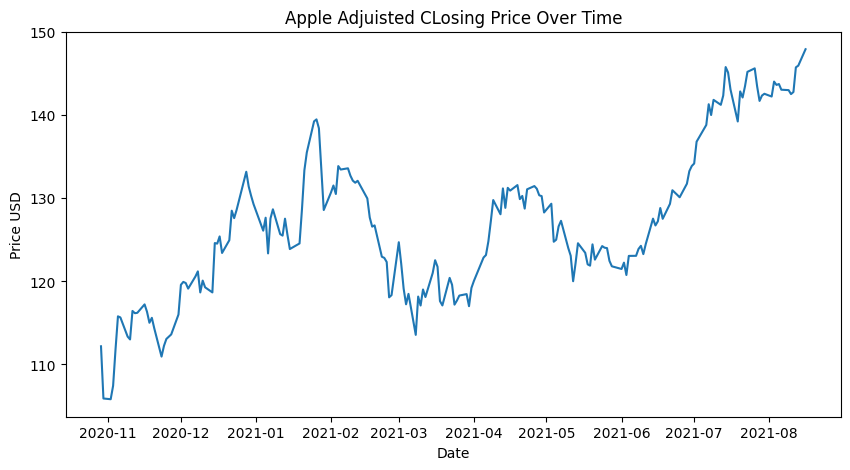

In [25]:
# line plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(aapl_data.index, aapl_data['adjClose'], label='AAPL Adj Close')
plt.title("Apple Adjuisted CLosing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.show()

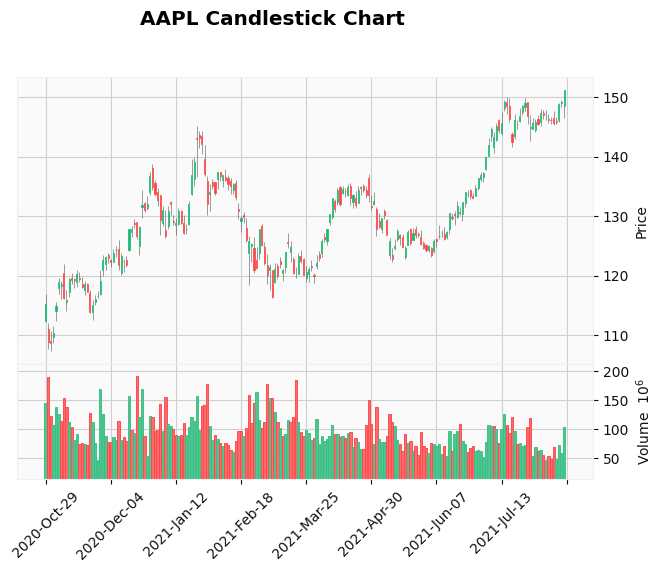

In [26]:
# bar chart

import mplfinance as mpf
mpf.plot(
    aapl_data, type='candle',
    style='yahoo', title='AAPL Candlestick Chart',
    volume=True
)

## Distribution Analysis

In [23]:
aapl_data['Simple_Return'] = aapl_data['adjClose'].pct_change()

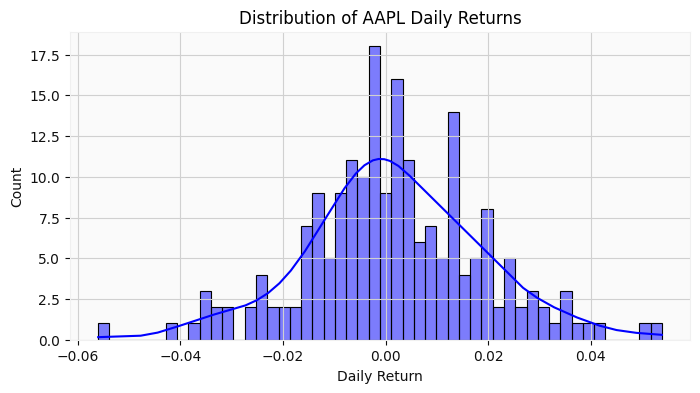

In [27]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(aapl_data['Simple_Return'], bins=50, kde=True, color='blue')
plt.title("Distribution of AAPL Daily Returns")
plt.xlabel("Daily Return")
plt.show()


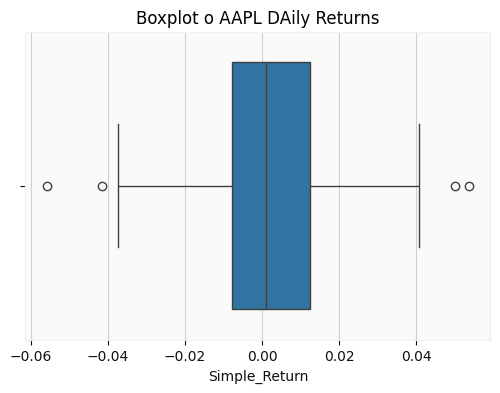

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x=aapl_data['Simple_Return'])
plt.title("Boxplot o AAPL DAily Returns")
plt.show()

### Correlation and Pairwise Analysis

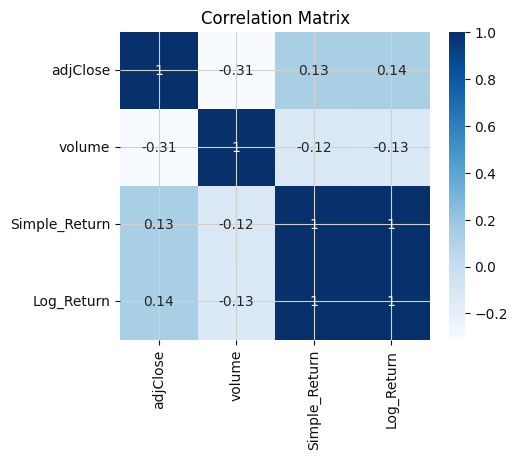

In [29]:
subset = aapl_data[['adjClose','volume','Simple_Return','Log_Return']]
corr_matrix = subset.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

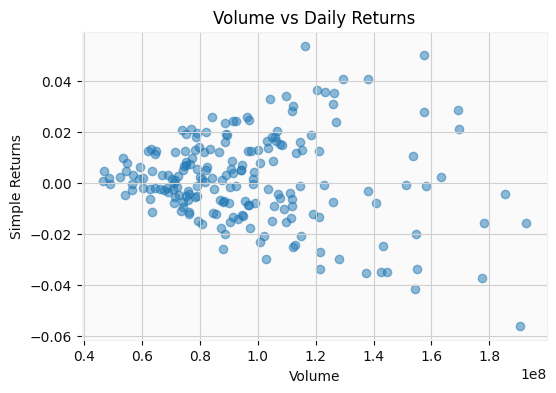

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(aapl_data['volume'],aapl_data['Simple_Return'], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Simple Returns")
plt.title("Volume vs Daily Returns")
plt.show()

### Time Series Specific EDA

1. Time series modeling oftern beenfits from stationarity whre mean, variance and autocorrelation remain constant over time
2. A low p-value(<0.05) suggests you can reject the null hypothesis. Null hypothesis says that series has a unit root that is non-stationary(random walk/trending). Alternate hypothesis says the series is stationary(mean-reverting, no unit root)
3. A higher p-value means the data may be non-stationary, indicating a trend or evolving variance over time

In [32]:
# Augmented Dickey-Fuller (ADF) Test

from statsmodels.tsa.stattools import adfuller

result = adfuller(aapl_data['Simple_Return'].dropna())
print("ADF STATISTIC:",result[0])
print("p-value:", result[1]) # data is stationary


ADF STATISTIC: -14.722485103507879
p-value: 2.73814202485623e-27


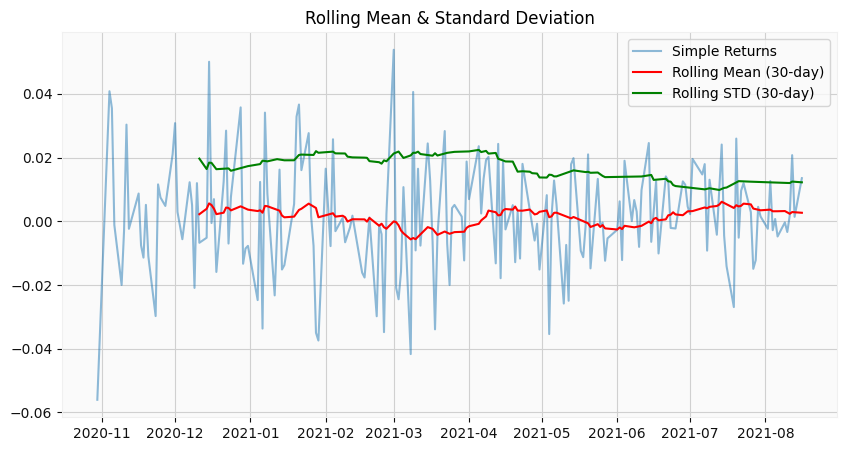

In [33]:
# plot rolling mean and std of Simple Returns to check
roll_mean = aapl_data['Simple_Return'].rolling(window=30).mean()
roll_std = aapl_data['Simple_Return'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(aapl_data['Simple_Return'], label="Simple Returns", alpha=0.5)
plt.plot(roll_mean, label="Rolling Mean (30-day)", color='red')
plt.plot(roll_std, label="Rolling STD (30-day)", color='green')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

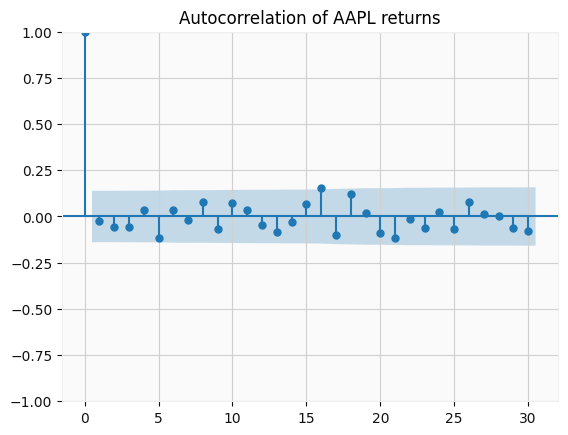

In [34]:
# auto correlation function measure how related a time series is with its own past values

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(aapl_data["Simple_Return"].dropna(), lags=30)
plt.title("Autocorrelation of AAPL returns")
plt.show()

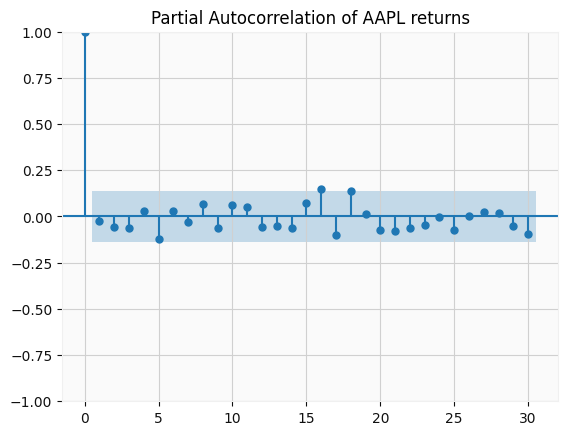

In [35]:
plot_pacf(aapl_data["Simple_Return"].dropna(), lags=30)
plt.title("Partial Autocorrelation of AAPL returns")
plt.show()

We have a spike at lag=1 in PACF. It indicates AR(1) structure. ARIMA model with p=1

In [36]:
aapl_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Simple_Return,Log_Return,MA_20,Vol_20,RSI
date,,,,,,,,,,,,,,,,,,,
2020-10-29 00:00:00+00:00,AAPL,2020-10-29 00:00:00+00:00,115.32,116.93,112.20,112.37,146129173,112.184904,113.751134,109.149724,109.315102,146129173,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2020-10-30 00:00:00+00:00,AAPL,2020-10-30 00:00:00+00:00,108.86,111.99,107.72,111.06,190573476,105.900525,108.945433,104.791518,108.040716,190573476,0.0,1.0,-0.056018,-0.057648,NaN,NaN,0.000000
2020-11-02 00:00:00+00:00,AAPL,2020-11-02 00:00:00+00:00,108.77,110.68,107.32,109.11,122866899,105.812972,107.671047,104.402392,106.143729,122866899,0.0,1.0,-0.000827,-0.000827,NaN,NaN,0.000000
2020-11-03 00:00:00+00:00,AAPL,2020-11-03 00:00:00+00:00,110.44,111.49,108.73,109.66,107624448,107.437571,108.459026,105.774060,106.678777,107624448,0.0,1.0,0.015353,0.015237,NaN,NaN,2.094438
2020-11-04 00:00:00+00:00,AAPL,2020-11-04 00:00:00+00:00,114.95,115.59,112.35,114.14,138235482,111.824962,112.447563,109.295646,111.036983,138235482,0.0,1.0,0.040837,0.040025,NaN,NaN,7.715776


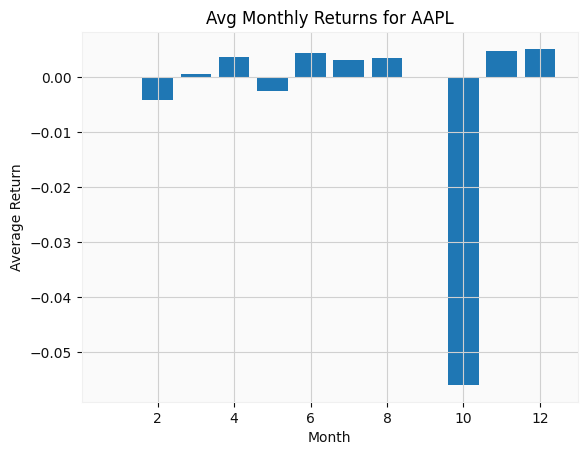

In [37]:
# checking for higher volatility or volumes on specific days or months

aapl_data['Month'] = aapl_data.index.month
monthly_avg_returns = aapl_data.groupby('Month')['Simple_Return'].mean()
plt.bar(monthly_avg_returns.index, monthly_avg_returns.values)
plt.xlabel("Month")
plt.ylabel("Average Return")
plt.title("Avg Monthly Returns for AAPL")
plt.show()

### Anomaly Detection

1. High/low spikes: identify days with significant price moves or volumes
2. Check for news ot events on those dates

In [39]:
z_scores = (aapl_data['Simple_Return']-aapl_data['Simple_Return'].mean())/aapl_data['Simple_Return'].std()
z_scores


date
2020-10-29 00:00:00+00:00         NaN
2020-10-30 00:00:00+00:00   -3.340534
2020-11-02 00:00:00+00:00   -0.137325
2020-11-03 00:00:00+00:00    0.801749
2020-11-04 00:00:00+00:00    2.280748
                               ...   
2021-08-10 00:00:00+00:00   -0.284008
2021-08-11 00:00:00+00:00    0.014298
2021-08-12 00:00:00+00:00    1.116308
2021-08-13 00:00:00+00:00   -0.007483
2021-08-16 00:00:00+00:00    0.696958
Name: Simple_Return, Length: 200, dtype: float64

In [40]:
threshold=3
extreme_moves = aapl_data[np.abs(z_scores)>threshold]
print(extreme_moves[['adjClose','Simple_Return']])

                             adjClose  Simple_Return
date                                                
2020-10-30 00:00:00+00:00  105.900525      -0.056018
2021-03-01 00:00:00+00:00  124.717279       0.053851


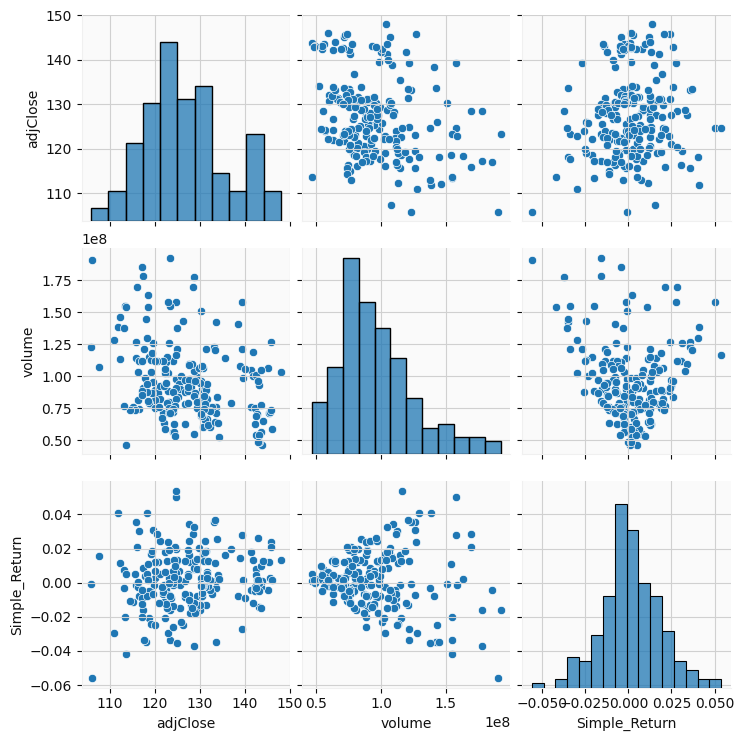

In [41]:
import seaborn as sns

sns.pairplot(aapl_data[['adjClose','volume','Simple_Return']])
plt.show()

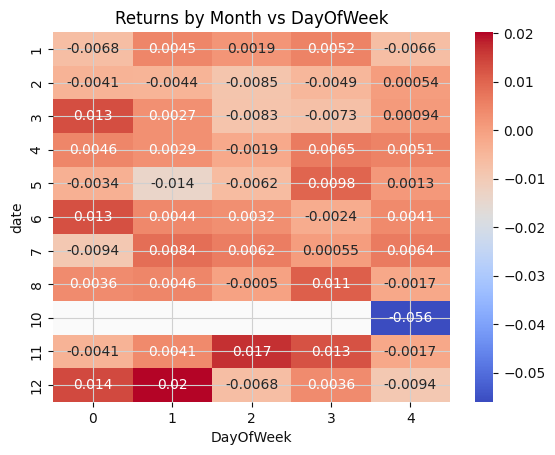

In [42]:
#heatmaps
# pivot a daily returns df to visualize day of week patterns
aapl_data['DayOfWeek'] = aapl_data.index.dayofweek
heatmap_data = aapl_data.pivot_table(
    values='Simple_Return',
    index=aapl_data.index.month,
    columns='DayOfWeek',
    aggfunc='mean'
)
sns.heatmap(heatmap_data,cmap='coolwarm',annot=True)
plt.title("Returns by Month vs DayOfWeek")
plt.show()

### Putting all together

1. Load data, initial checks
2. plot price and volume
3. compute Simple Returns
4. Summary stats and distreibution plots,
5. correlation plots between columns
6. stationary checks like ADF on returns, rolling mean.std on returns
7. Plotting acf and pacf
8. seasonality check i.e., group by day of week, check avg returns or volumes
9. anomaly detection using heatmaps to identify extreme return days and investigate them individually

## Regression and Forecasting techniques

1. These methods can be used to predict future values of asset prices, returns or risk metrics.
2. Key considerations: 
    a. Stationarity: manty time series models require stationary data
    b. Autocorrelation and Seasonality: Financial data often exhibit autocorrelation, volatility clustering, and seasonal patterns.
    c. Assumption Checks: Whether using classical regression or time series models, always validate assumptions on residuals and data properties

### Linear regression approaches

Ordinary Least Squares(OLS): It finds coefficients $\beta$ that minimize the sum of squared residuals. This is used in factor models, predictive regressions etc.,

In [43]:
#1. Fetch data

df_aapl = pdr.get_data_tiingo('AAPL', api_key=TIINGO_API_KEY, start="2022-01-01", end="2023-01-01")
df_spy = pdr.get_data_tiingo('SPY', api_key=TIINGO_API_KEY, start="2022-01-01", end="2023-01-01")

In [44]:
# 2. Calculate daily returns
df_aapl['Returns'] = df_aapl['adjClose'].pct_change()
df_spy['MarketReturns'] = df_spy['adjClose'].pct_change()

In [45]:
df_aapl.head()

close    high     low    open     volume  \
symbol date                                                                   
AAPL   2022-01-03 00:00:00+00:00  182.01  182.88  177.71  177.83  104701220   
       2022-01-04 00:00:00+00:00  179.70  182.94  179.12  182.63   99310438   
       2022-01-05 00:00:00+00:00  174.92  180.17  174.64  179.61   94537602   
       2022-01-06 00:00:00+00:00  172.00  175.30  171.64  172.70   96903955   
       2022-01-07 00:00:00+00:00  172.17  174.14  171.03  172.89   86709147   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2022-01-03 00:00:00+00:00  178.460693  179.313728  174.244546   
       2022-01-04 00:00:00+00:00  176.195740  179.372558  175.627050   
       2022-01-05 00:00:00+00:00  171.508953  176.656574  171.234413   
       2022-01-06 00:00:00+00:00  168.645895  171.881542  168.292915   
       2022-01-07 00:00:00+00:00  168.812579  170.744163  167.694810   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
AAPL   2022-01-03 00:00:00+00:00  174.362206  104701220      0.0          1.0   
       2022-01-04 00:00:00+00:00  179.068603   99310438      0.0          1.0   
       2022-01-05 00:00:00+00:00  176.107495   94537602      0.0          1.0   
       2022-01-06 00:00:00+00:00  169.332244   96903955      0.0          1.0   
       2022-01-07 00:00:00+00:00  169.518539   86709147      0.0          1.0   

                                   Returns  
symbol date                                 
AAPL   2022-01-03 00:00:00+00:00       NaN  
       2022-01-04 00:00:00+00:00 -0.012692  
       2022-01-05 00:00:00+00:00 -0.026600  
       2022-01-06 00:00:00+00:00 -0.016693  
       2022-01-07 00:00:00+00:00  0.000988

In [46]:
df_spy.head()

close    high       low    open     volume  \
symbol date                                                                     
SPY    2022-01-03 00:00:00+00:00  477.71  477.85  473.8500  476.30   72668233   
       2022-01-04 00:00:00+00:00  477.55  479.98  475.5800  479.22   71178678   
       2022-01-05 00:00:00+00:00  468.38  477.98  468.2801  477.16  104538940   
       2022-01-06 00:00:00+00:00  467.94  470.82  465.4300  467.89   86858900   
       2022-01-07 00:00:00+00:00  466.09  469.20  464.6500  467.95   85111593   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
SPY    2022-01-03 00:00:00+00:00  453.149031  453.281833  449.487489   
       2022-01-04 00:00:00+00:00  452.997257  455.302321  451.128543   
       2022-01-05 00:00:00+00:00  444.298724  453.405149  444.203960   
       2022-01-06 00:00:00+00:00  443.881346  446.613273  441.500395   
       2022-01-07 00:00:00+00:00  442.126462  445.076564  440.760498   

                                     adjOpen  adjVolume  divCash  splitFactor  \
symbol date                                                                     
SPY    2022-01-03 00:00:00+00:00  451.811525   72668233      0.0          1.0   
       2022-01-04 00:00:00+00:00  454.581396   71178678      0.0          1.0   
       2022-01-05 00:00:00+00:00  452.627309  104538940      0.0          1.0   
       2022-01-06 00:00:00+00:00  443.833916   86858900      0.0          1.0   
       2022-01-07 00:00:00+00:00  443.890832   85111593      0.0          1.0   

                                  MarketReturns  
symbol date                                      
SPY    2022-01-03 00:00:00+00:00            NaN  
       2022-01-04 00:00:00+00:00      -0.000335  
       2022-01-05 00:00:00+00:00      -0.019202  
       2022-01-06 00:00:00+00:00      -0.000939  
       2022-01-07 00:00:00+00:00      -0.003953

In [49]:
df_aapl.index = df_aapl.index.droplevel(0)
df_aapl.index

DatetimeIndex(['2022-01-03 00:00:00+00:00', '2022-01-04 00:00:00+00:00',
               '2022-01-05 00:00:00+00:00', '2022-01-06 00:00:00+00:00',
               '2022-01-07 00:00:00+00:00', '2022-01-10 00:00:00+00:00',
               '2022-01-11 00:00:00+00:00', '2022-01-12 00:00:00+00:00',
               '2022-01-13 00:00:00+00:00', '2022-01-14 00:00:00+00:00',
               ...
               '2022-12-16 00:00:00+00:00', '2022-12-19 00:00:00+00:00',
               '2022-12-20 00:00:00+00:00', '2022-12-21 00:00:00+00:00',
               '2022-12-22 00:00:00+00:00', '2022-12-23 00:00:00+00:00',
               '2022-12-27 00:00:00+00:00', '2022-12-28 00:00:00+00:00',
               '2022-12-29 00:00:00+00:00', '2022-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=251, freq=None)

In [50]:
df_spy.index = df_spy.index.droplevel(0)
df_spy.index

DatetimeIndex(['2022-01-03 00:00:00+00:00', '2022-01-04 00:00:00+00:00',
               '2022-01-05 00:00:00+00:00', '2022-01-06 00:00:00+00:00',
               '2022-01-07 00:00:00+00:00', '2022-01-10 00:00:00+00:00',
               '2022-01-11 00:00:00+00:00', '2022-01-12 00:00:00+00:00',
               '2022-01-13 00:00:00+00:00', '2022-01-14 00:00:00+00:00',
               ...
               '2022-12-16 00:00:00+00:00', '2022-12-19 00:00:00+00:00',
               '2022-12-20 00:00:00+00:00', '2022-12-21 00:00:00+00:00',
               '2022-12-22 00:00:00+00:00', '2022-12-23 00:00:00+00:00',
               '2022-12-27 00:00:00+00:00', '2022-12-28 00:00:00+00:00',
               '2022-12-29 00:00:00+00:00', '2022-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=251, freq=None)

In [51]:
# 3. Align by date and drop NAN

data = pd.merge(df_aapl[["Returns"]], df_spy[["MarketReturns"]],
                how="inner",left_index=True, right_index=True).dropna()

In [52]:
# 4. Define X(market returns) and y(aapl)
X = data[['MarketReturns']]
y = data["Returns"]

In [53]:
# 5. add intercept to the model
import statsmodels.api as sm
X = sm.add_constant(X)

In [54]:
print("X shape:", X.shape)
print("y shape:", y.shape)
y

X shape: (250, 2)
y shape: (250,)


date
2022-01-04 00:00:00+00:00   -0.012692
2022-01-05 00:00:00+00:00   -0.026600
2022-01-06 00:00:00+00:00   -0.016693
2022-01-07 00:00:00+00:00    0.000988
2022-01-10 00:00:00+00:00    0.000116
                               ...   
2022-12-23 00:00:00+00:00   -0.002798
2022-12-27 00:00:00+00:00   -0.013878
2022-12-28 00:00:00+00:00   -0.030685
2022-12-29 00:00:00+00:00    0.028324
2022-12-30 00:00:00+00:00    0.002469
Name: Returns, Length: 250, dtype: float64

In [55]:
# 6. Fit OLS model
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     900.1
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           1.70e-84
Time:                        01:01:52   Log-Likelihood:                 786.20
No. Observations:                 250   AIC:                            -1568.
Df Residuals:                     248   BIC:                            -1561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.001     -0.230

### Regularized Regression

- Ridge
- Lasso
- Elastic Net

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

print("Ridge Model Coefficients:", ridge_model.coef_)
print("Training R^2 Score:", ridge_model.score(X_train, y_train))
print("Testing R^2 Score:", ridge_model.score(X_test, y_test))

Ridge Model Coefficients: [0.         0.05833701]
Training R^2 Score: 0.06896118173323718
Testing R^2 Score: 0.050601597649658436


## 3. Classical Time Series Models

### 3.1 ARIMA (Autoregressive Integrated Moving Average)

In [60]:
aapl_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,...,adjVolume,divCash,splitFactor,Simple_Return,Log_Return,MA_20,Vol_20,RSI,Month,DayOfWeek
date,,,,,,,,,,,,,,,,,,,,,
2020-10-29 00:00:00+00:00,AAPL,2020-10-29 00:00:00+00:00,115.32,116.93,112.20,112.37,146129173,112.184904,113.751134,109.149724,...,146129173,0.0,1.0,NaN,NaN,NaN,NaN,NaN,10,3
2020-10-30 00:00:00+00:00,AAPL,2020-10-30 00:00:00+00:00,108.86,111.99,107.72,111.06,190573476,105.900525,108.945433,104.791518,...,190573476,0.0,1.0,-0.056018,-0.057648,NaN,NaN,0.000000,10,4
2020-11-02 00:00:00+00:00,AAPL,2020-11-02 00:00:00+00:00,108.77,110.68,107.32,109.11,122866899,105.812972,107.671047,104.402392,...,122866899,0.0,1.0,-0.000827,-0.000827,NaN,NaN,0.000000,11,0
2020-11-03 00:00:00+00:00,AAPL,2020-11-03 00:00:00+00:00,110.44,111.49,108.73,109.66,107624448,107.437571,108.459026,105.774060,...,107624448,0.0,1.0,0.015353,0.015237,NaN,NaN,2.094438,11,1
2020-11-04 00:00:00+00:00,AAPL,2020-11-04 00:00:00+00:00,114.95,115.59,112.35,114.14,138235482,111.824962,112.447563,109.295646,...,138235482,0.0,1.0,0.040837,0.040025,NaN,NaN,7.715776,11,2


In [61]:
aapl_data.dropna(inplace=True)

In [62]:
aapl_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,...,adjVolume,divCash,splitFactor,Simple_Return,Log_Return,MA_20,Vol_20,RSI,Month,DayOfWeek
date,,,,,,,,,,,,,,,,,,,,,
2020-11-27 00:00:00+00:00,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,113.616276,114.493320,113.255713,...,46691331,0.0,1.0,0.004826,0.004815,113.302533,0.349674,22.472436,11,4
2020-11-30 00:00:00+00:00,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,116.013531,117.884560,113.830664,...,169410176,0.0,1.0,0.021100,0.020880,113.808183,0.280298,27.681819,11,0
2020-12-01 00:00:00+00:00,AAPL,2020-12-01 00:00:00+00:00,122.72,123.4693,120.01,121.01,125920963,119.589925,120.320113,116.949046,...,125920963,0.0,1.0,0.030827,0.030362,114.497031,0.293881,34.728277,12,1
2020-12-02 00:00:00+00:00,AAPL,2020-12-02 00:00:00+00:00,123.08,123.3700,120.89,122.02,89004195,119.940743,120.223346,117.806601,...,89004195,0.0,1.0,0.002934,0.002929,115.122189,0.292059,35.393277,12,2
2020-12-03 00:00:00+00:00,AAPL,2020-12-03 00:00:00+00:00,122.94,123.7800,122.21,123.52,78967630,119.804314,120.622889,119.092933,...,78967630,0.0,1.0,-0.001137,-0.001138,115.521157,0.262592,35.242901,12,3


In [63]:
train_size = int(len(aapl_data)*0.8)
train, test = aapl_data['Log_Return'][:train_size], aapl_data['Log_Return'][train_size:]

# fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,0,1)) # p,d,q
model_fit = model.fit()

/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [64]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  144
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 378.074
Date:                Thu, 30 Oct 2025   AIC                           -748.148
Time:                        02:35:07   BIC                           -736.269
Sample:                             0   HQIC                          -743.321
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.735      0.463      -0.002       0.004
ar.L1          0.3882      0.764      0.508      0.612      -1.110       1.886
ma.L1         -0.4603      0.733     -0.628      0.5

In [65]:
from sklearn.metrics import mean_squared_error
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
print("Mean Squared Error of ARIMA model:", mse)

Mean Squared Error of ARIMA model: 0.000139405870712831


/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_model_fit = sarimax_model.fit()

/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Log_Return   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 323.896
Date:                            Thu, 30 Oct 2025   AIC                           -637.793
Time:                                    02:37:48   BIC                           -623.417
Sample:                                         0   HQIC                          -631.951
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0818      0.093     -0.884      0.377      -0.263       0.100
ma.L1         -0.9576      0.062    -15.435      0.000      -1.079      -0.836
ar.S.L12      -0.0378      0.119     -0.317      0.752      -0.272       0.196
ma.S.L12      -0.9425      0.442     -2.131      0.033      -1.809      -0.076
sigma2         0.0003      0.000      2.504      0.012    7.31e-05       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.94   Prob(JB):                         0.66
Heteroskedasticity (H):               0.53   Skew:                             0.18
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
sarimax_forecast = sarimax_model_fit.forecast(steps=len(test))
sarimax_mse = mean_squared_error(test, sarimax_forecast)
print("Mean Squared Error of SARIMAX model:", sarimax_mse)

Mean Squared Error of SARIMAX model: 0.00016847425520856581


/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/abhay/Desktop/qbp_prep/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Generalized Autoregressive COnditional Heteroskedasticity(GARCH)

In [71]:
from arch import arch_model
returns = aapl_data['Log_Return']*100  # GARCH models often work better with percentage returns
train_size = int(len(returns)*0.8)
train, test = returns[:train_size], returns[train_size:]

# fit the model
garch_model = arch_model(train, vol='GARCH', p=1, q=1,dist="normal")
garch_result = garch_model.fit(disp="off")
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -283.361
Distribution:                  Normal   AIC:                           574.722
Method:            Maximum Likelihood   BIC:                           586.601
                                        No. Observations:                  144
Date:                Thu, Oct 30 2025   Df Residuals:                      143
Time:                        02:41:14   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1182      0.632      0.187      0.852 [ -1.120,  1.35

In [72]:
garch_forecasts = garch_result.forecast(horizon=len(test))
fcast_var = garch_forecasts.variance.iloc[-1].values
fcast_vol = np.sqrt(fcast_var)
print("Forecasted Volatility:", fcast_vol)

Forecasted Volatility: [1.20616968 1.20293895 1.19971687 1.19650342 1.19329858 1.19010232
 1.18691463 1.18373547 1.18056483 1.17740268 1.174249   1.17110377
 1.16796696 1.16483855 1.16171853 1.15860686 1.15550352 1.1524085
 1.14932177 1.14624331 1.14317309 1.14011109 1.1370573  1.13401169
 1.13097423 1.12794491 1.12492371 1.1219106  1.11890555 1.11590856
 1.1129196  1.10993864 1.10696566 1.10400065 1.10104358 1.09809443]


## 4. Machine Learning Approach

- Random Forest
- Gradient Boosting
- LSTMs, GRU, MLP

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

